In [34]:
#%load_ext zipline
from zipline.api import order, record, sid, symbol, symbols, set_benchmark, order_target_percent, get_open_orders, schedule_function, date_rules, time_rules, set_symbol_lookup_date
import zipline
import matplotlib.pyplot as plt
import pandas as pd
import pytz
from datetime import datetime
import pickle

In [85]:
def initialize(context):
    #set_benchmark(sid(8554))
    set_symbol_lookup_date('2018-11-15')
    context.fb = symbol('FB')
    # load saved ml model to make everyday prediction
    context.trading_model = pickle.load(open('FB_model.pickle', 'rb'))
    tickers = pickle.load(open('sp500.pickle','rb'))
    context.references = [symbol(ticker) for ticker in tickers]
    context.flag = 0
    
    schedule_function(ml_trade,
                      date_rules.every_day(),
                      time_rules.market_open())
    
    schedule_function(record_vars,
                      date_rules.every_day(),
                      time_rules.market_close(minutes=1))
    
# using today's data to make buy sell hold prediction
# add that trading flag to context
def before_trading_start(context, data):
    # current_price = data.current(symbol('stock'), 'price')
    # past_prices = data.history(stock, fields='price', bar_count=5, frequency='1d')
    past_prices = data.history(context.references, fields='close', bar_count=2, frequency='1d')
    past_prices = past_prices.pct_change()
    past_prices.dropna(how='all', inplace=True)
    past_prices.fillna(value=0.0, inplace=True)
    
    X_test_today = past_prices.values.tolist()
    
    #prevent error from data anormally
    try:
        prediction = context.trading_model.predict(X_test_today)
        context.flag = prediction[0]
    except:
        context.flag = 0
        
    print("The trading signal of today is : ", context.flag)
    
# schduled to run once a day to make trade according to the prediction flag
def ml_trade(context, data):
    if context.flag == 1:
        order_target_percent(context.fb, 1.0)       
    elif context.flag == -1:
        order_target_percent(context.fb, -1.0)
    else:
        pass

def record_vars(context, data):
    pass

# what to handle with the data
def handle_data(context, data):
    pass


In [86]:
import warnings
warnings.filterwarnings('ignore')
perf = zipline.run_algorithm(start=datetime(2012, 5, 18, 0, 0, 0, 0, pytz.utc), 
                             end=datetime(2018, 11, 15, 0, 0, 0, 0, pytz.utc),
                             initialize=initialize,
                             before_trading_start=before_trading_start,
                             capital_base=1000000)

#performance df always return daily performance of your portfolio
perf.head(15)

The trading signal of today is :  0
The trading signal of today is :  0
The trading signal of today is :  -1
The trading signal of today is :  0
The trading signal of today is :  -1
The trading signal of today is :  -1
The trading signal of today is :  0
The trading signal of today is :  1
The trading signal of today is :  0
The trading signal of today is :  0
The trading signal of today is :  -1
The trading signal of today is :  1
The trading signal of today is :  0
The trading signal of today is :  0
The trading signal of today is :  1
The trading signal of today is :  0
The trading signal of today is :  1
The trading signal of today is :  1
The trading signal of today is :  0
The trading signal of today is :  -1
The trading signal of today is :  -1
The trading signal of today is :  -1
The trading signal of today is :  1
The trading signal of today is :  0
The trading signal of today is :  -1
The trading signal of today is :  -1
The trading signal of today is :  -1
The trading signal

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-05-18 20:00:00+00:00,NaN,0.000000,NaN,0.0,NaN,NaN,0.000000e+00,1.000000e+06,0.000,0.000,...,0.000,0.000,0,NaN,1.000000e+06,0.000,0.000,1,[],0.0
2012-05-21 20:00:00+00:00,0.000000,0.000000,NaN,0.0,0.0,NaN,0.000000e+00,1.000000e+06,0.000,0.000,...,0.000,0.000,0,NaN,1.000000e+06,0.000,0.000,2,[],0.0
2012-05-22 20:00:00+00:00,0.000000,0.000000,NaN,0.0,0.0,NaN,0.000000e+00,1.000000e+06,0.000,0.000,...,0.000,0.000,0,NaN,1.000000e+06,0.000,0.000,3,[],0.0
2012-05-23 20:00:00+00:00,0.004353,-0.000548,NaN,0.0,0.0,NaN,1.031708e+06,2.031708e+06,-1032256.000,-1032256.000,...,-1032256.000,-1032256.000,1,-7.937254,1.000000e+06,0.000,0.000,4,"[{'amount': -32258, 'dt': 2012-05-23 20:00:00+...",0.0
2012-05-24 20:00:00+00:00,0.235066,-0.033774,NaN,0.0,0.0,NaN,0.000000e+00,2.031708e+06,-1065481.740,-1065481.740,...,-1065481.740,-1065481.740,1,-7.215423,2.031708e+06,-1032256.000,-1032256.000,5,[],0.0
2012-05-25 20:00:00+00:00,0.354793,0.002304,NaN,0.0,0.0,NaN,-9.594050e+04,1.935767e+06,-933463.230,-933463.230,...,-933463.230,-933463.230,1,0.691326,2.031708e+06,-1065481.740,-1065481.740,6,"[{'amount': 3005, 'dt': 2012-05-25 20:00:00+00...",0.0
2012-05-29 20:00:00+00:00,0.624420,0.092077,NaN,0.0,0.0,NaN,6.217462e+04,1.997942e+06,-905864.400,-905864.400,...,-905864.400,-905864.400,1,16.803260,1.935767e+06,-933463.230,-933463.230,7,"[{'amount': -2157, 'dt': 2012-05-29 20:00:00+0...",0.0
2012-05-30 20:00:00+00:00,0.578892,0.112494,NaN,0.0,0.0,NaN,0.000000e+00,1.997942e+06,-885447.900,-885447.900,...,-885447.900,-885447.900,1,18.873823,1.997942e+06,-905864.400,-905864.400,8,[],0.0
2012-05-31 20:00:00+00:00,0.614238,0.067086,NaN,0.0,0.0,NaN,-2.098990e+06,-1.010485e+05,1168134.400,1168134.400,...,0.000,0.000,0,7.135755,1.997942e+06,-885447.900,-885447.900,9,"[{'amount': 70874, 'dt': 2012-05-31 20:00:00+0...",0.0
2012-06-01 20:00:00+00:00,0.697422,-0.007106,NaN,0.0,0.0,NaN,0.000000e+00,-1.010485e+05,1093942.080,1093942.080,...,0.000,0.000,0,0.084308,-1.010485e+05,1168134.400,1168134.400,10,[],0.0


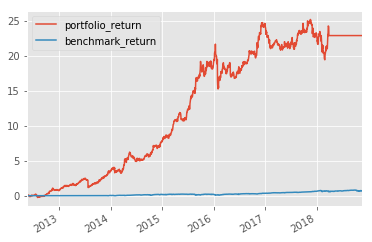

In [87]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

#from daily return calculate and plot cumulative return
perf.algorithm_period_return.plot(label='portfolio_return')
perf.benchmark_period_return.plot(label='benchmark_return')
plt.legend(loc=2)

plt.show()

In [ ]:
#perf.benchmark_period_return.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='benchmark_return')